In [352]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics


In [353]:
#load_data
data=tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)

In [354]:
# Create the classifiers
clf = svm.SVC(kernel='linear', C = 1)

In [355]:
#Split dataset into Train and Test
(x_train, y_train), (x_test, y_test) = data
print("x_train Shape: ",x_train.shape)
print("x_test Shape: ",x_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

x_train Shape:  (60000, 28, 28)
x_test Shape:  (10000, 28, 28)
y_train Shape:  (60000,)
y_test Shape:  (10000,)


In [356]:
#reshape 
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)

x_train:  (60000, 784)
x_test:  (10000, 784)


In [357]:
#take the first 60 rows
x_train = x_train[:60,:]
#take the first 10 rows
x_test = x_test[:10,:]

In [358]:
print(x_train.shape)
print(x_test.shape)

(60, 784)
(10, 784)


In [359]:
y_train = y_train[:60]
y_test=y_test[:10]

In [360]:
#Train the model using SVM
clf.fit(x_train, y_train)

SVC(C=1, kernel='linear')

In [361]:
#Predicting Accuracy for SVM 
svm_pred = clf.predict(x_test)
print("Prediction using SVM: ",svm_pred)

Prediction using SVM:  [7 3 1 0 7 1 9 9 5 9]


In [362]:
#This would avoid several warnings and errors
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

In [363]:
model = Sequential([
    #model expects rows of feature data with shape input_shape 
    layers.InputLayer(input_shape=(28, 28, 1)),   
    layers.Conv2D(64, 3, padding='same', activation='relu'),  #hidden layer
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(64, 3, padding='same', activation='relu'),  #hidden layer
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(), #create array of pixels of single dimension since Dense takes 1D input
    
    layers.Dense(64, activation='relu'),  #hidden layer
    layers.Dense(10, activation='softmax'),
    
])

In [364]:
# Print the model summary
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_21 (Flatten)        (None, 3136)              0         
                                                                 
 dense_40 (Dense)            (None, 64)              

In [365]:
 model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [366]:
x_train = x_train.reshape(-1, 28,28, 1)
x_test = x_test.reshape(-1, 28,28, 1)
print(x_train.shape)
print(x_test.shape)

(60, 28, 28, 1)
(10, 28, 28, 1)


In [367]:
# Train the model
print(f'\nMODEL TRAINING:')
model.fit(x_train, y_train,batch_size=64, epochs=10)


MODEL TRAINING:
Epoch 1/10
1/1 [==============================] - 0s 370ms/step - loss: 39.0556 - accuracy: 0.0833
Epoch 2/10
1/1 [==============================] - 0s 270ms/step - loss: 22.4173 - accuracy: 0.1333
Epoch 3/10
1/1 [==============================] - 0s 321ms/step - loss: 17.4255 - accuracy: 0.2333
Epoch 4/10
1/1 [==============================] - 0s 304ms/step - loss: 16.0054 - accuracy: 0.3000
Epoch 5/10
1/1 [==============================] - 0s 294ms/step - loss: 11.3579 - accuracy: 0.4833
Epoch 6/10
1/1 [==============================] - 0s 364ms/step - loss: 8.8853 - accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 285ms/step - loss: 7.5949 - accuracy: 0.5333
Epoch 8/10
1/1 [==============================] - 0s 279ms/step - loss: 5.9875 - accuracy: 0.6500
Epoch 9/10
1/1 [==============================] - 0s 295ms/step - loss: 4.4767 - accuracy: 0.7500
Epoch 10/10
1/1 [==============================] - 0s 250ms/step - loss: 3.5008 - accuracy: 0.76

In [368]:
predictions = model.predict(x_test)
print(np.argmax(np.round(predictions[0])))

1/1 [==============================] - 0s 67ms/step
7


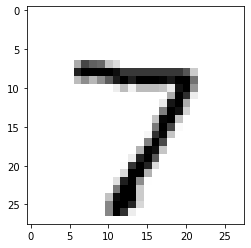

In [369]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

In [370]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss', test_loss)
print("Accuracy of model using SVM:",metrics.accuracy_score(y_test, svm_pred))
print('Accuracy of model using CNN', test_acc)

1/1 [==============================] - 0s 71ms/step - loss: 3.9851 - accuracy: 0.6000
Test loss 3.985121250152588
Accuracy of model using SVM: 0.7
Accuracy of model using CNN 0.6000000238418579
